# Incidence de la varicelle

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import isoweek
import requests
import os

Les données de l'incidence de la varicelle sont disponibles du site Web du [Réseau Sentinelles](http://www.sentiweb.fr/). Nous les récupérons sous forme d'un fichier en format CSV dont chaque ligne correspond à une semaine de la période demandée. Nous téléchargeons toujours le jeu de données complet, qui commence en 1984 et se termine avec une semaine récente.

In [5]:
csv_name = "incidence-PAY-7.csv"
data_url = "http://www.sentiweb.fr/datasets/" + csv_name
file_exists = os.path.exists(csv_name)
if not file_exists:
    print('file doesnt exist: dowloading')
    r = requests.get(data_url)
    data = r.text
    with open(csv_name, "w", encoding='UTF-8') as text_file:
        text_file.write(data)

with open(csv_name, "rb") as text_file:
    print(text_file.readlines())

file doesnt exist: dowloading
[b'# @source="r\xc3\xa9seau Sentinelles, INSERM, Sorbonne Universit\xc3\xa9, http://www.sentiweb.fr", @meta={"period":[199049,202217],"geo":["PAY","1"],"geo_ref":"insee","indicator":"7","type":"all","conf_int":true,"compact":false}, @date=2022-05-07T15:49:00+02:00\n', b'week,indicator,inc,inc_low,inc_up,inc100,inc100_low,inc100_up,geo_insee,geo_name\n', b'202217,7,23490,17979,29001,35,27,43,FR,France\n', b'202216,7,19696,14751,24641,30,23,37,FR,France\n', b'202215,7,17722,13643,21801,27,21,33,FR,France\n', b'202214,7,17005,13162,20848,26,20,32,FR,France\n', b'202213,7,15448,11659,19237,23,17,29,FR,France\n', b'202212,7,14702,10794,18610,22,16,28,FR,France\n', b'202211,7,11729,8347,15111,18,13,23,FR,France\n', b'202210,7,13314,10036,16592,20,15,25,FR,France\n', b'202209,7,10485,7600,13370,16,12,20,FR,France\n', b'202208,7,12088,8741,15435,18,13,23,FR,France\n', b'202207,7,14003,10789,17217,21,16,26,FR,France\n', b'202206,7,9798,7048,12548,15,11,19,FR,France

La première ligne du fichier CSV est un commentaire, que nous ignorons en précisant `skiprows=1`.

In [6]:
raw_data = pd.read_csv(data_url, encoding = 'iso-8859-1', skiprows=1)
raw_data

week  indicator    inc  inc_low  inc_up  inc100  inc100_low  \
0     202217          7  23490    17979   29001      35          27   
1     202216          7  19696    14751   24641      30          23   
2     202215          7  17722    13643   21801      27          21   
3     202214          7  17005    13162   20848      26          20   
4     202213          7  15448    11659   19237      23          17   
5     202212          7  14702    10794   18610      22          16   
6     202211          7  11729     8347   15111      18          13   
7     202210          7  13314    10036   16592      20          15   
8     202209          7  10485     7600   13370      16          12   
9     202208          7  12088     8741   15435      18          13   
10    202207          7  14003    10789   17217      21          16   
11    202206          7   9798     7048   12548      15          11   
12    202205          7  10851     7797   13905      16          11   
13    202204          7   9547     6721   12373      14          10   
14    202203          7  13972    10680   17264      21          16   
15    202202          7   8495     6026   10964      13           9   
16    202201          7  13793    10597   16989      21          16   
17    202152          7  13239     9611   16867      20          15   
18    202151          7  13326     9629   17023      20          14   
19    202150          7  14128    10312   17944      21          15   
20    202149          7  13674    10369   16979      21          16   
21    202148          7  11549     8503   14595      17          12   
22    202147          7  11419     8376   14462      17          12   
23    202146          7   8216     5724   10708      12           8   
24    202145          7   8965     6468   11462      14          10   
25    202144          7   8736     5636   11836      13           8   
26    202143          7   8145     5164   11126      12           7   
27    202142          7   9443     6037   12849      14           9   
28    202141          7   4021     2239    5803       6           3   
29    202140          7   4441     2454    6428       7           4   
...      ...        ...    ...      ...     ...     ...         ...   
1609  199126          7  17608    11304   23912      31          20   
1610  199125          7  16169    10700   21638      28          18   
1611  199124          7  16171    10071   22271      28          17   
1612  199123          7  11947     7671   16223      21          13   
1613  199122          7  15452     9953   20951      27          17   
1614  199121          7  14903     8975   20831      26          16   
1615  199120          7  19053    12742   25364      34          23   
1616  199119          7  16739    11246   22232      29          19   
1617  199118          7  21385    13882   28888      38          25   
1618  199117          7  13462     8877   18047      24          16   
1619  199116          7  14857    10068   19646      26          18   
1620  199115          7  13975     9781   18169      25          18   
1621  199114          7  12265     7684   16846      22          14   
1622  199113          7   9567     6041   13093      17          11   
1623  199112          7  10864     7331   14397      19          13   
1624  199111          7  15574    11184   19964      27          19   
1625  199110          7  16643    11372   21914      29          20   
1626  199109          7  13741     8780   18702      24          15   
1627  199108          7  13289     8813   17765      23          15   
1628  199107          7  12337     8077   16597      22          15   
1629  199106          7  10877     7013   14741      19          12   
1630  199105          7  10442     6544   14340      18          11   
1631  199104          7   7913     4563   11263      14           8   
1632  199103          7  15387    10484   20290      27          18   
1633  199102          7  16277  

In [7]:
raw_data[raw_data.isnull().any(axis=1)]

Empty DataFrame
Columns: [week, indicator, inc, inc_low, inc_up, inc100, inc100_low, inc100_up, geo_insee, geo_name]
Index: []

Y a-t-il des points manquants dans ce jeux de données ? Non

On regarde rapidement si il y a des risques de valeurs suspectes

In [17]:
raw_data.describe()
data = raw_data.copy() # does not seem required

Nos données utilisent une convention inhabituelle: le numéro de
semaine est collé à l'année, donnant l'impression qu'il s'agit
de nombre entier. C'est comme ça que Pandas les interprète.Un deuxième problème est que Pandas ne comprend pas les numéros de
semaine.  Il faut lui fournir les dates de début et de fin de
semaine. Nous utilisons pour cela la bibliothèque `isoweek`.Comme la conversion des semaines est devenu assez complexe, nous
écrivons une petite fonction Python pour cela. Ensuite, nous
l'appliquons à tous les points de nos donnés. Les résultats vont
dans une nouvelle colonne 'period'.

In [19]:
data.week

0       202217
1       202216
2       202215
3       202214
4       202213
5       202212
6       202211
7       202210
8       202209
9       202208
10      202207
11      202206
12      202205
13      202204
14      202203
15      202202
16      202201
17      202152
18      202151
19      202150
20      202149
21      202148
22      202147
23      202146
24      202145
25      202144
26      202143
27      202142
28      202141
29      202140
         ...  
1609    199126
1610    199125
1611    199124
1612    199123
1613    199122
1614    199121
1615    199120
1616    199119
1617    199118
1618    199117
1619    199116
1620    199115
1621    199114
1622    199113
1623    199112
1624    199111
1625    199110
1626    199109
1627    199108
1628    199107
1629    199106
1630    199105
1631    199104
1632    199103
1633    199102
1634    199101
1635    199052
1636    199051
1637    199050
1638    199049
Name: week, Length: 1639, dtype: int64

In [20]:
 def convert_week(year_and_week_int):
    year_and_week_str = str(year_and_week_int)
    year = int(year_and_week_str[:4])
    week = int(year_and_week_str[4:])
    w = isoweek.Week(year, week)
    return pd.Period(w.day(0), 'W')

data['period'] = [convert_week(yw) for yw in data['week']]

Il restent deux petites modifications à faire.Premièrement, nous définissons les périodes d'observation
comme nouvel index de notre jeux de données. Ceci en fait
une suite chronologique, ce qui sera pratique par la suite.Deuxièmement, nous trions les points par période, dans
le sens chronologique.

In [21]:
sorted_data = data.set_index('period').sort_index() 

In [22]:
periods = sorted_data.index
for p1, p2 in zip(periods[:-1], periods[1:]):
    delta = p2.to_timestamp() - p1.end_time
    if delta > pd.Timedelta('1s'):
        print(p1, p2)

Un premier regard sur les données !

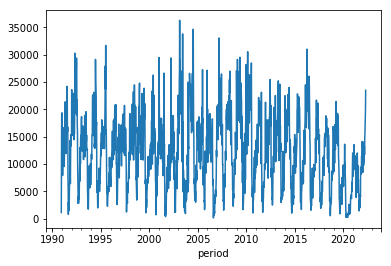

In [24]:
sorted_data['inc'].plot()

Un zoom sur les dernières années montre mieux la situation des pics en hiver. Le creux des incidences se trouve en été.

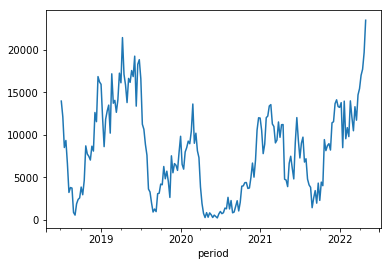

In [25]:
sorted_data['inc'][-200:].plot() 

## Etude de l'incidence annuelle

Etant donné que le pic de l'épidémie se situe en hiver, à cheval
entre deux années civiles, nous définissons la période de référence
entre deux minima de l'incidence, du 1er août de l'année N au
1er septembre de l'année N+1.Notre tâche est un peu compliquée par le fait que l'année ne comporte
pas un nombre entier de semaines. Nous modifions donc un peu nos périodes
de référence: à la place du 1er septembre de chaque année, nous utilisons le
premier jour de la semaine qui contient le septembre.Comme l'incidence de syndrome grippal est très faible en été, cette
modification ne risque pas de fausser nos conclusions.Encore un petit détail: les données commencent an octobre 1984, ce qui
rend la première année incomplète. Nous commençons donc l'analyse en 1985.

In [29]:
 first_august_week = [pd.Period(pd.Timestamp(y, 9, 1), 'W')
                     for y in range(1991,
                                    sorted_data.index[-1].year)]

 En partant de cette liste des semaines qui contiennent un 1er septembre, nous obtenons nos intervalles d'environ un an comme les périodes entre deux semaines adjacentes dans cette liste. Nous calculons les sommes des incidences hebdomadaires pour toutes ces périodes.Nous vérifions également que ces périodes contiennent entre 51 et 52 semaines, pour nous protéger contre des éventuelles erreurs dans notre code.

In [30]:
year = []
yearly_incidence = []
for week1, week2 in zip(first_august_week[:-1],
                        first_august_week[1:]):
    one_year = sorted_data['inc'][week1:week2-1]
    assert abs(len(one_year)-52) < 2
    yearly_incidence.append(one_year.sum())
    year.append(week2.year)
yearly_incidence = pd.Series(data=yearly_incidence, index=year)

Voici les incidences annuelles.

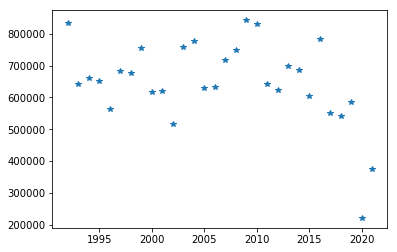

In [31]:
yearly_incidence.plot(style='*') 

In [32]:
yearly_incidence.sort_values()

2020    221186
2021    376290
2002    516689
2018    542312
2017    551041
1996    564901
2019    584066
2015    604382
2000    617597
2001    619041
2012    624573
2005    628464
2006    632833
2011    642368
1993    643387
1995    652478
1994    661409
1998    677775
1997    683434
2014    685769
2013    698332
2007    717352
2008    749478
1999    756456
2003    758363
2004    777388
2016    782114
2010    829911
1992    832939
2009    842373
dtype: int64

 Enfin, un histogramme montre bien que les épidémies fortes, qui touchent environ 10% de la population
  française, sont assez rares: il y en eu trois au cours des N dernières années.

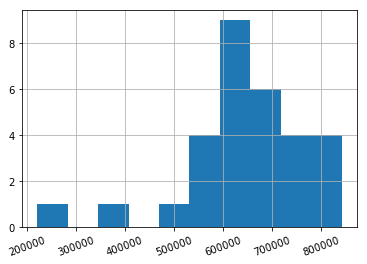

In [33]:
yearly_incidence.hist(xrot=20)